<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M3_212_Deutsch_Algorithm_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Arda Çınar and Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b><font color="blue"> Solutions for </font>Deutsch's Algorithm</b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py"
    !wget --no-cache -O oracle.py {url}

    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

--2025-06-13 00:30:45--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3128 (3.1K) [text/plain]
Saving to: ‘oracle.py’

oracle.py           100%[===================>]   3.05K  --.-KB/s    in 0s      

2025-06-13 00:30:45 (37.9 MB/s) - ‘oracle.py’ saved [3128/3128]



<a name="task1"></a>
### Task 1


You are given an oracle function called `oracle()`, which returns randomly a quantum circuit with 2 qubits corresponding to an either constant or a balanced function $f$. This circuit represents the operator $U_f$ in our algorithm. Note that qubit 0 is the input and qubit 1 is the output qubit.

Implement the proposed algorithm to decide whether or not your oracle function is constant or even.

(Note: You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit?)

<h5>Qiskit notes:</h5>

- Run the following cell to load oracle function.
- You can use `circuit += oracle()` to add the oracle to your whole circuit. (In general, you can define functions returning circuits and append them to your circuit by `+=`.)
- Barriers are not quantum programming primitives but they instruct qiskit to not apply any optimizations across the barrier and also useful for visualization. You may add them to your circuit using `circuit.barrier()`.


<h3> Solution </h3>

In [2]:
quantum_file = path_files+"oracle.py"
%run $quantum_file

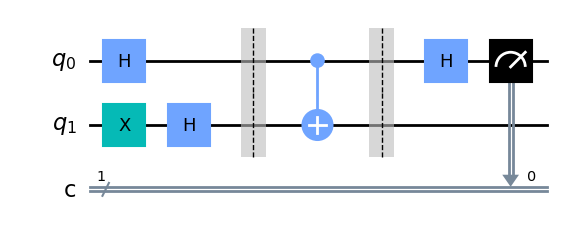

In [3]:
from qiskit import QuantumCircuit, execute, Aer

circuit = QuantumCircuit(2, 1)

# Apply X and H to qubit 1
circuit.x(1)
circuit.h(1)

# Apply H to qubit 0
circuit.h(0)

# Apply oracle
circuit.compose(oracle(), inplace=True)

# Apply H to qubit 0
circuit.h(0)

# Measure qubit 0
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [4]:
job = execute(circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'1': 10000}


<a name="task2"></a>
### Task 2

There are four possible functions $f(x)$. Could you identify what these are?

Write down the `oracle()` function which implements each. That is, you should construct a circuit implementing $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $.

Note that qubit 0 is the input and qubit 1 is the output qubit. One of the functions is implemented for you to give you an idea.

<h3>Solution</h3>

In [5]:
import random
from qiskit import QuantumCircuit, execute, Aer

#f(0)=f(1)=0
def oracle1():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    # do nothing
    circuit.barrier()

    return circuit

#f(0)=f(1)=1
def oracle2():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    circuit.x(1)
    circuit.barrier()

    return circuit

#f(0)=0, f(1)=1
def oracle3():
    circuit = QuantumCircuit(2)

    circuit.barrier()
    circuit.cx(0, 1)
    circuit.barrier()

    return circuit

#f(0)=1 f(1)=0
def oracle4():
    circuit = QuantumCircuit(2)

    circuit.barrier()

    circuit.x(0)
    circuit.cx(0, 1)
    circuit.x(0)

    circuit.barrier()

    return circuit
